<center>
 <h2> ILI286 - Computación Científica II </h2>
<h1>Tarea 5</h1></center>
<br>
<left>Nombre: Erick Barrera G. <br> Correo: <a>erick.barrera@alumnos.usm.cl</a> <br> ROL: 201073529-K</left>
<br>
<h2>__Introducción:__</h2>

A continuación se aplica el uso de diferencias finitas para la resolución de una ecuación de calor en 3D
 
<h2>__Desarrollo y análisis de resultados:__</h2>

### Librerias:

In [12]:
import numpy as np
%matplotlib inline
#%matplotlib
import matplotlib.pyplot as plt;
import scipy as sp
import scipy.optimize as opt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.mlab as mlab
import matplotlib as mplot
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from scipy.misc import factorial
from scipy import misc



### 3.1

Utilizando diferencias finitas se tiene:

$\frac{w_{ijk+1}-w_{ijk}}{p}=\frac{\alpha w_{i+1jk}-2w_{ijk}+w_{i-1jk}}{m^2} + \frac{\alpha w_{ij+1k}-2w_{ijk}+w_{ij-1k}}{n^2}$

Condiciones de borde:

$cw_{0jk} - (1-c)\frac{w_{1jk}-w_{0jk}}{m}=0$

$cw_{i0k} - (1-c)\frac{w_{i1k}-w_{i0k}}{m}=0$

$cw_{mjk} + (1-c)\frac{w_{mjk}-w_{m-1jk}}{m}=0$

$cw_{ink} + (1-c)\frac{w_{ink}-w_{in-1k}}{m}=0$

$w_{ij0}=\frac{(x_0+m*i)(y_0+n*j)(x_0+m*i-10)(y_0+n*j-10)}{x_0+m*i+3}$

### 3.2

Se tienen condiciones de frontera  de Robin, los valores se agregan a la matriz de coeficientes según corresponda. Si $c=0$, se pasa a condiciones de Neumann y para $c=1$ a condiciones de Dirichlet.

### 3.3

In [13]:
lidx = lambda i,j,m: (i+(j)*m) 
bd = lambda x,y: (x*y*(x-10)*(y-10))/(x+3)

C=0

def calor(D,C,a,b,c,d,ti,tf,M,N,P):
    
    m=(b-a)/M
    n=(d-c)/N
    p=(tf-ti)/P
    sg=D*p/m**2
    ld=D*p/n**2
    sc=(1-2*sg-2*ld)
    x=np.linspace(a,b,M)
    y=np.linspace(c,d,N)
    t=np.linspace(ti,tf,P+1)
    wijk=np.zeros(((M)*(N),(M)*(N)))
    ws=np.zeros(((M)*(N),P+1))
    for i in range (0,M):
        for j in range (0,N):
            ws[lidx(i,j,M),0]=bd(x[i],y[j])
            
            if(i!=0 and i!=M-1 and j!=0 and j!=N-1):
                wijk[lidx(i,j,M),lidx(i,j,M)]=sc
                wijk[lidx(i,j,M),lidx(i-1,j,M)]=sg
                wijk[lidx(i,j,M),lidx(i+1,j,M)]=sg
                wijk[lidx(i,j,M),lidx(i,j-1,M)]=ld
                wijk[lidx(i,j,M),lidx(i,j+1,M)]=ld
            else:
                wijk[lidx(i,j,M),lidx(i,j,M)]=sc
                if(i==0):
                    
                    if(m==1 and C==0.5):
                        wijk[lidx(i,j,M),lidx(i,j,M)]+=0
                    else:
                        wijk[lidx(i,j,M),lidx(i,j,M)]+=sg*(1-C)/(m*C-(1-C))
                    wijk[lidx(i,j,M),lidx(i+1,j,M)]=sg
                    if(j!=0):
                        wijk[lidx(i,j,M),lidx(i,j-1,M)]=ld
                    if(j!=N-1):    
                        wijk[lidx(i,j,M),lidx(i,j+1,M)]=ld
                elif(i==M-1):
                   
                    wijk[lidx(i,j,M),lidx(i,j,M)]+=-sg*(1-C)/(m*C+(1-C))
                    wijk[lidx(i,j,M),lidx(i-1,j,M)]=sg
                    if(j!=0):
                        wijk[lidx(i,j,M),lidx(i,j-1,M)]=ld
                    if(j!=N-1):
                        wijk[lidx(i,j,M),lidx(i,j+1,M)]=ld
                if(j==0):
                    if(n==1 and C==0.5):
                        wijk[lidx(i,j,M),lidx(i,j,M)]+=0
                    else:
                        wijk[lidx(i,j,M),lidx(i,j,M)]+=ld*(1-C)/(n*C-(1-C))
                    if(i!=M-1):
                        wijk[lidx(i,j,M),lidx(i+1,j,M)]=sg
                    if(i!=0):
                        wijk[lidx(i,j,M),lidx(i-1,j,M)]=sg
                    wijk[lidx(i,j,M),lidx(i,j+1,M)]=ld
                elif(j==N-1):
                                        
                    wijk[lidx(i,j,M),lidx(i,j,M)]+=-ld*(1-C)/(n*C+(1-C))
                    if(i!=0):
                        wijk[lidx(i,j,M),lidx(i-1,j,M)]=sg
                    if(i!=M-1):
                        wijk[lidx(i,j,M),lidx(i+1,j,M)]=sg
                    wijk[lidx(i,j,M),lidx(i,j-1,M)]=ld
            
            #else:
            
    w=np.zeros((M,N,P+1))
    for k in range (P):
        ws[:,k+1]=np.dot(wijk,ws[:,k])
        for i in range (M):
            for j in range (N):
                    if(k==0):
                        w[i,j,k]=ws[lidx(i,j,M),k]
                    w[i,j,k+1]=ws[lidx(i,j,M),k+1]    
    return x,y,t,w
                
M=20
N=20
ws=np.zeros(((M)*(N),1))
for i in range (0,M):
    for j in range (0,N):
        #print (lidx(i,j,M))
        ws[lidx(i,j,M)]=1
#print(ws)


x,y,t,w=calor(1,1,0,10,0,10,0,5,20,20,400)    
#print (w[:,:,1])

### 3.4

In [14]:
def pl_it(C,T):
    #A=np.array([a],dtype='int64')
    #B=np.array([b],dtype='int64')
    #A=a
    #B=b
    
    k=C
    #print (k)
    x,y,t,w=calor(1,C,0,10,0,10,0,5,10,10,500)  
    
    print (w.shape)
    ta, = np.where( t==T )
    print (ta, " ",t[ta] )
    aux=np.int(ta)
   
    plt.figure(2)
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111, projection='3d')
    xv, yv = np.meshgrid(x, y)
    ax.plot_surface(xv, yv, w[:,:,aux], rstride=1, cstride=1)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()


interact(pl_it, C=(0,1,0.1), T=(0,5,1))

<function __main__.pl_it>

### 4.1

tamaño imagen : (128, 128, 3)


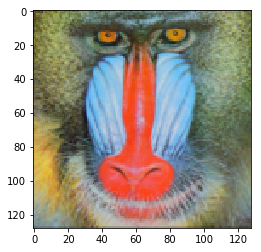

Img Gris:


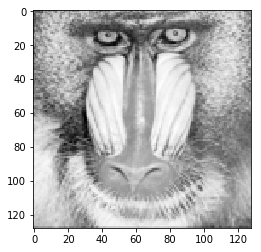

In [15]:
image = misc.imread('mandrill.png')
image=misc.imresize(image, (128,128))
print("tamaño imagen :",image.shape)
plt.imshow(image) #load
plt.show()

def weightedAverage(pixel):
    return 0.299*pixel[0] + 0.587*pixel[1] + 0.114*pixel[2]
grey = np.zeros((image.shape[0], image.shape[1])) # init 2D numpy array
# get row number
for rownum in range(len(image)):
    for colnum in range(len(image[rownum])):
        grey[rownum][colnum] = weightedAverage(image[rownum][colnum])

print ("Img Gris:")
plt.imshow(grey, cmap = mplot.cm.Greys_r) #load
plt.show()
#print (grey.shape[0], grey.shape[1])

### 4.2

In [8]:
def blur(D,C,grey,ti,tf,P):
    a=0
    b=grey.shape[0]
    c=0
    d=grey.shape[1]
    M=grey.shape[0]
    N=grey.shape[1]
    m=(b-a)/M
    n=(d-c)/N
    p=(tf-ti)/P
    sg=D*p/m
    ld=D*p/n
    sc=(1-2*sg-2*ld)
    x=np.linspace(a,b,M+1)
    y=np.linspace(c,d,N+1)
    t=np.linspace(ti,tf,P+1)
    #print (x)
    x=np.linspace(a,b,M)
    y=np.linspace(c,d,N)
    t=np.linspace(ti,tf,P+1)
    wijk=np.zeros(((M)*(N),(M)*(N)))
    ws=np.zeros(((M)*(N),P+1))
    for i in range (0,M):
        for j in range (0,N):
            ws[lidx(i,j,M),0]=grey[i,j]
            
            if(i!=0 and i!=M-1 and j!=0 and j!=N-1):
                wijk[lidx(i,j,M),lidx(i,j,M)]=sc
                wijk[lidx(i,j,M),lidx(i-1,j,M)]=sg
                wijk[lidx(i,j,M),lidx(i+1,j,M)]=sg
                wijk[lidx(i,j,M),lidx(i,j-1,M)]=ld
                wijk[lidx(i,j,M),lidx(i,j+1,M)]=ld
            else:
                wijk[lidx(i,j,M),lidx(i,j,M)]=sc
                
                if(i==0):
                    
                    if(m==1 and C==0.5):
                        wijk[lidx(i,j,M),lidx(i,j,M)]+=sg*2*m*c
                        wijk[lidx(i,j,M),lidx(i+1,j,M)]+=-sg*(1-c)
                    else:
                        wijk[lidx(i,j,M),lidx(i,j,M)]+=sg*(1-C)/(m*C-(1-C))
                        wijk[lidx(i,j,M),lidx(i+1,j,M)]=sg
                        if(j!=0):
                            wijk[lidx(i,j,M),lidx(i,j-1,M)]=ld
                        if(j!=N-1):    
                            wijk[lidx(i,j,M),lidx(i,j+1,M)]=ld
                elif(i==M-1):
                    if(m==1 and C==0.5):
                        wijk[lidx(i,j,M),lidx(i,j,M)]+=sg*2*m*c
                        wijk[lidx(i,j,M),lidx(i-1,j,M)]+=sg*(1-c)
                    else:
                        wijk[lidx(i,j,M),lidx(i,j,M)]+=-sg*(1-C)/(m*C+(1-C))
                        wijk[lidx(i,j,M),lidx(i-1,j,M)]=sg
                        if(j!=0):
                            wijk[lidx(i,j,M),lidx(i,j-1,M)]=ld
                        if(j!=N-1):
                            wijk[lidx(i,j,M),lidx(i,j+1,M)]=ld
                if(j==0):
                    if(n==1 and C==0.5):
                        wijk[lidx(i,j,M),lidx(i,j,M)]=ld*2*n*c
                        wijk[lidx(i,j,M),lidx(i,j+1,M)]=-ld*(1-c)
                    else:
                        wijk[lidx(i,j,M),lidx(i,j,M)]+=ld*(1-C)/(n*C-(1-C))
                        if(i!=M-1):
                            wijk[lidx(i,j,M),lidx(i+1,j,M)]=sg
                        if(i!=0):
                            wijk[lidx(i,j,M),lidx(i-1,j,M)]=sg
                    wijk[lidx(i,j,M),lidx(i,j+1,M)]=ld
                elif(j==N-1):
                    if(n==1 and C==0.5):
                        wijk[lidx(i,j,M),lidx(i,j,M)]=ld*2*n*c
                        wijk[lidx(i,j,M),lidx(i,j-1,M)]=ld*(1-c)
                    else:
                        wijk[lidx(i,j,M),lidx(i,j,M)]+=-ld*(1-C)/(n*C+(1-C))
                        if(i!=0):
                            wijk[lidx(i,j,M),lidx(i-1,j,M)]=sg
                        if(i!=M-1):
                            wijk[lidx(i,j,M),lidx(i+1,j,M)]=sg
                        wijk[lidx(i,j,M),lidx(i,j-1,M)]=ld

            #else:
            
    w=np.zeros((M,N,P+1))
    for k in range (P):
        ws[:,k+1]=np.dot(wijk,ws[:,k])
        for i in range (M):
            for j in range (N):
                    if(k==0):
                        w[i,j,k]=ws[lidx(i,j,M),k]
                    w[i,j,k+1]=ws[lidx(i,j,M),k+1]    
    return x,y,t,w




### 4.3

In [9]:
def pl_it(C,T):

    k=C
    #print (k)
    x,y,t,w=blur(1,C,grey,0,30,400)
    ta, = np.where( t==T )
    #print (ta, " ",t[ta] )
    aux=np.int(ta)
    plt.imshow(w[:,:,aux], cmap = mplot.cm.Greys_r) #load
    plt.show()

interact(pl_it, C=(0,1,0.1), T=(0,30,1))

<function __main__.pl_it>

Se consigue el blur, el cual va aumentando con el tiempo. 

### 4.4 

Se logra observar que en las imágenes con mayor c, la imagen tiende a ser de forma muy leve, más oscura. Para $c=0.5$, la velocidad con que la imagen se atenúa es mucho mayor a la observada para los otros valores.

### 5.1

tamaño imagen : (127, 168)


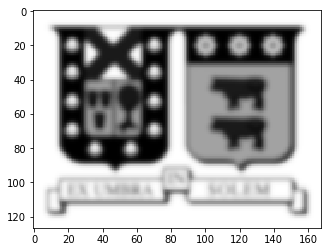

In [16]:
def show_imhist(im):
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    # Mostrar imagen en tiempo k
    plt.imshow(im, cmap='gray')
    
    # Mostrar histograma
    plt.subplot(1,2,2)
    bins=np.linspace(0,1,100)
    plt.hist(im.flatten() ,bins=bins, normed=True)
    plt.grid(True)
    
    plt.show()

image = misc.imread('blurred.tiff')
image=misc.imresize(image, (np.int(image.shape[0]/3) ,np.int(image.shape[1]/3)))
print("tamaño imagen :",image.shape)
plt.imshow(image, cmap = mplot.cm.Greys_r) #load
plt.show()

### 5.2-5.3

In [17]:
def pl_it(dt,T):
    #A=np.array([a],dtype='int64')
    #B=np.array([b],dtype='int64')
    #A=a
    #B=b
    if (dt==0):
        dt=0.1
    T0=np.int(30/dt)
    #k=C
 
    x,y,t,w=blur(-1,1,image,0,30,T0)

    
    ta, = np.where( t==T )

    aux=np.int(ta)
    show_imhist(w[:,:,aux] )
interact(pl_it, dt=(0,5,0.2), T=(0,30,1))

<function __main__.pl_it>

No se consiguió revertir la imagen, a medida que el tiempo pasa la imagen se oscurece y el histograma desaparece. Pueden existir problemas al realizar el deblur debido a que se utilizó una imagen reducida de la original, debido a problemas técnicos con el tamaño de esta.

<h2>__Conclusión:__</h2>


Se logró apreciar la utilidad de diferencias finitas a la hora de enfrentarse a problemas con 3 dimensiones, además de casos prácticos para el uso de la ecuación de calor.



<h2>__Referencias:__</h2>

* _numpy_ http://www.numpy.org
* _matplotlib_ http://matplotlib.org
* _scipy_ https://www.scipy.org/scipylib/index.html


In [6]:
a = 5
print (a)

5
